[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figure 8.8

Demonstration that uncorrelation implies independence for Gaussian random vectors\
Topics: Correlation, Gaussian random vector, uncorrelation, independence, conditional distribution

Author: Carlos Fernandez-Granda

/Users/carlos/anaconda3/bin:/Users/carlos/anaconda3/condabin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/texlive/2019/bin/x86_64-darwin:/usr/local/texlive/2019/bin/x86_64-darwin:/usr/local/texlive/2019/bin/x86_64-darwin


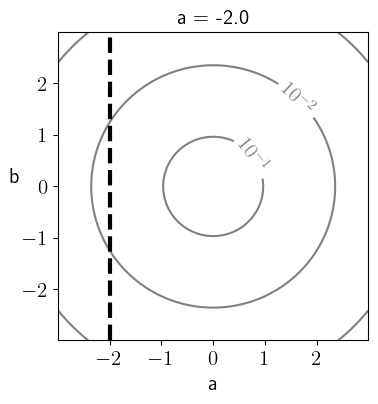

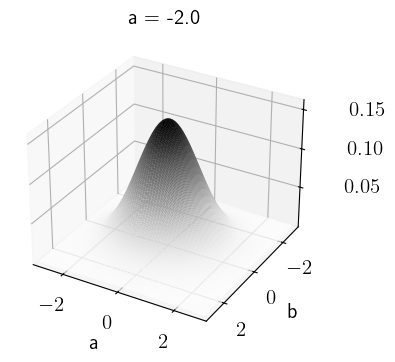

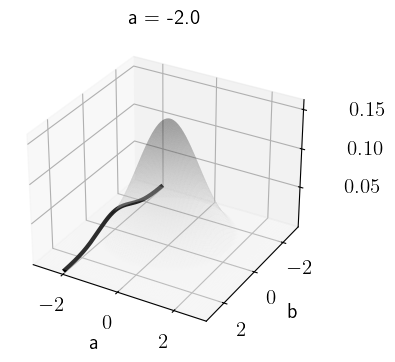

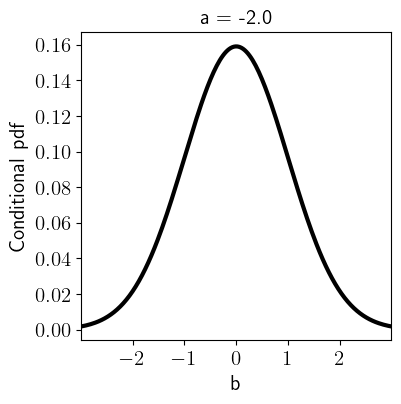

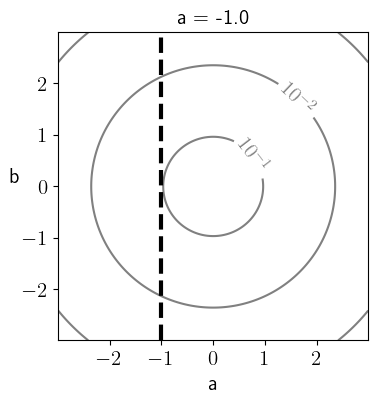

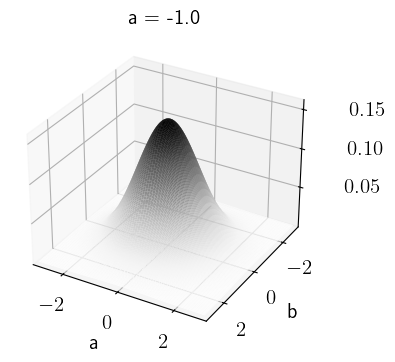

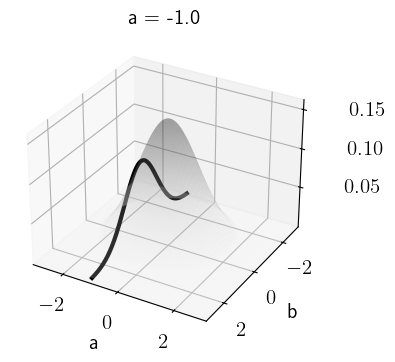

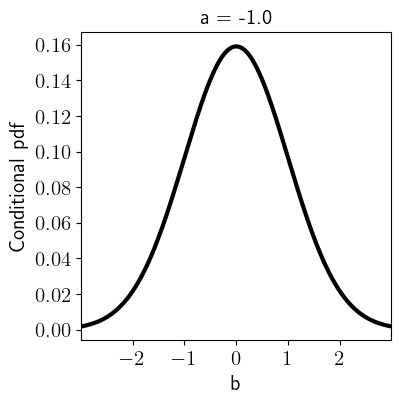

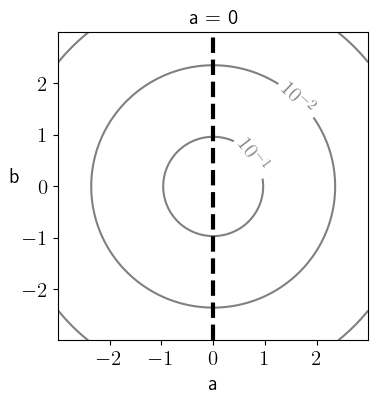

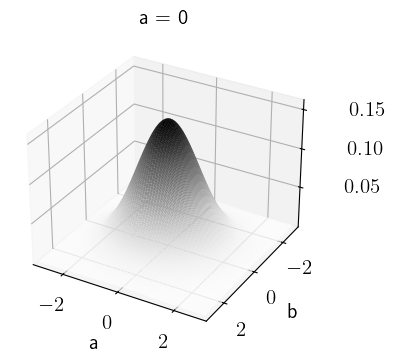

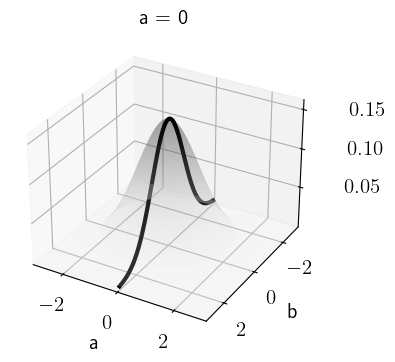

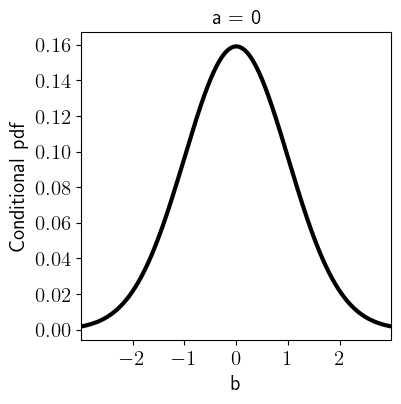

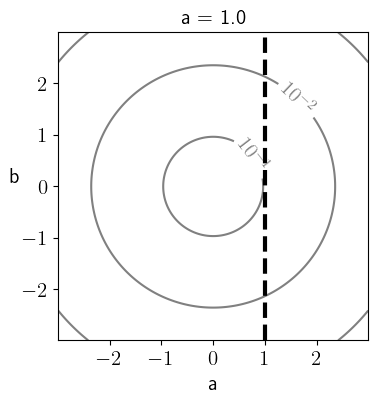

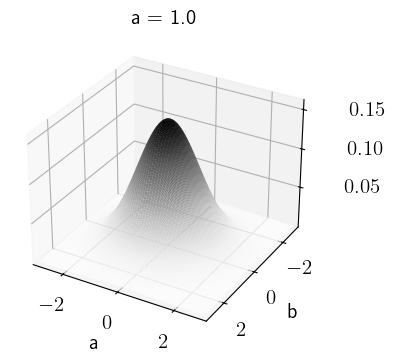

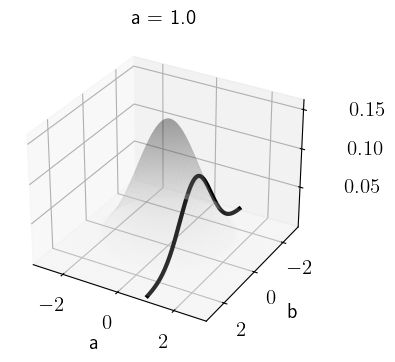

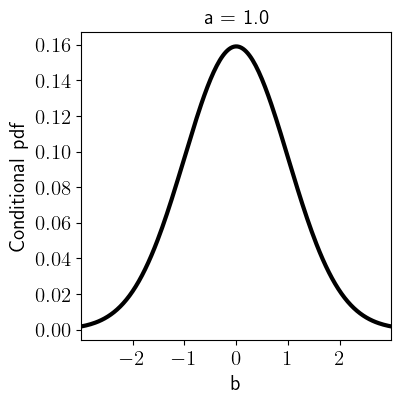

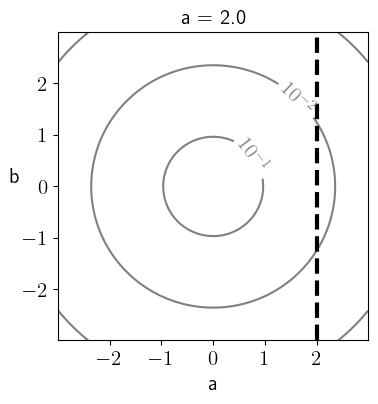

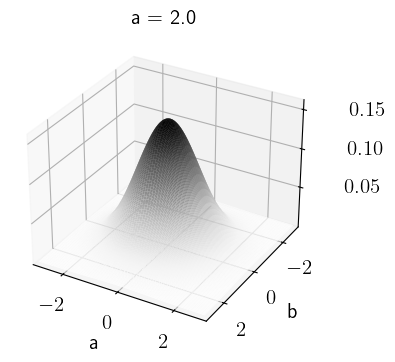

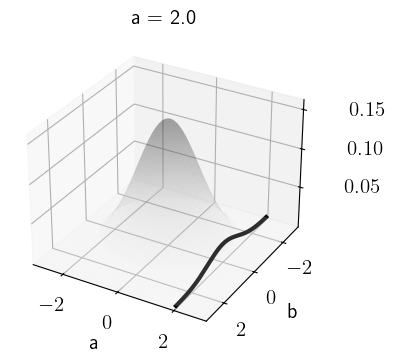

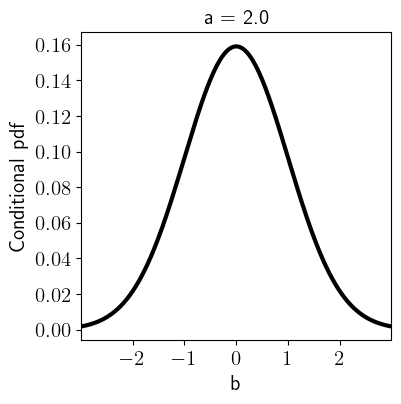

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import Axes3D

font_size = 15
font_size_ticks = 15

xmin = -2.99
xmax = 2.99
ymin = -2.99
ymax = 2.99
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax,200)

def gaussian(x,y,rho):
    return (np.exp(-( x**2 - 2*rho*x*y + y**2)/2/(1-rho**2))
                  /(2 * np.pi * np.sqrt(1-rho**2)))

def gaussian_cond(x,y,rho):
    return (np.exp(-( (y-rho * x)**2 )/2/(1-rho**2))
                  /(2 * np.pi * np.sqrt(1-rho**2)))

X, Y = np.meshgrid(x, y)

rho = 0
level_list = [1e-30,1e-20,1e-10,1e-7,1e-4,1e-2,1e-1,0.25]
cond_vals = [-2.0,-1.0,0,1.0,2.0]

for ind,cond_val in enumerate(cond_vals):
    Z = gaussian(X, Y,rho)

    fig = plt.figure(figsize = (4,4)) 
    CS = plt.contour(X, Y, Z, levels = level_list,colors='gray')
    fmt = {}
    strs = [r'$10^{-30}$',r'$10^{-20}$',r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$','0.25']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    plt.clabel(CS, fontsize=font_size, inline=1,fmt=fmt)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.vlines(cond_val,ymin,ymax,lw=3,ls="dashed",color="black")
    plt.xlabel("a", fontsize=font_size,labelpad=5)
    h = plt.ylabel("b", fontsize=font_size,labelpad=5)
    h.set_rotation(0)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.title("a = " + str(cond_val),fontsize=font_size)
    
    fig = plt.figure(figsize = (4,4)) 
    ax = fig.add_subplot(projection = '3d')
    z_cond = gaussian(cond_val, y,rho)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=3, cmap='Greys',alpha=1,edgecolor='none',rasterized=True)
    plt.xticks([-2,0,2],fontsize=font_size_ticks) 
    plt.yticks([-2,0,2],fontsize=font_size_ticks)
    ax.zaxis.set_tick_params(labelsize=font_size_ticks,pad=20)
    plt.ylim([ymax,ymin])
    plt.xlim([xmin,xmax])
    #ax.set_zlim3d(zmin,zmax)
    plt.ylabel('b',fontsize=font_size,labelpad=5)
    plt.xlabel('a',fontsize=font_size,labelpad=5)
    plt.title("a = " + str(cond_val),fontsize=font_size)
    
    fig = plt.figure(figsize = (4,4)) 
    ax = fig.add_subplot(projection = '3d')
    z_cond = gaussian(cond_val, y,rho)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=3, cmap='Greys',alpha=0.2,edgecolor='none',rasterized=True)
    plt.xticks([-2,0,2],fontsize=font_size_ticks) 
    plt.yticks([-2,0,2],fontsize=font_size_ticks)
    ax.zaxis.set_tick_params(labelsize=font_size_ticks,pad=20)
    ax.plot(cond_val*np.ones(len(x)), y, z_cond,lw=3,color="black",alpha=1)
    plt.ylim([ymax,ymin])
    plt.xlim([xmin,xmax])
    #ax.set_zlim3d(zmin,zmax)
    plt.ylabel('b',fontsize=font_size,labelpad=5)
    plt.xlabel('a',fontsize=font_size,labelpad=5)
    plt.title("a = " + str(cond_val),fontsize=font_size)
    
    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(y,gaussian_cond(cond_val,y,rho),color="black",lw=3)
    plt.xlim([xmin,xmax])
    # plt.ylim([0,f_max])
    plt.xlabel("b", fontsize=font_size,labelpad=5)
    plt.ylabel(r"Conditional pdf", fontsize=font_size,labelpad=5)
    plt.title("a = " + str(cond_val),fontsize=font_size)
